In [1]:
# First, implement a version of the naive exact matching algorithm that is strand-aware. 
# That is, instead of looking only for occurrences of P in T, additionally look for occurrences of thereverse complement of P in T. 
# If P is ACT, your function should find occurrences of both ACTand its reverse complement AGT in T.

In [10]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t


def naive_with_rc(p, t):
    
    occurrences = []
    
    # loop over forward alignments
    for i in range(len(t) - len(p) + 1):  
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    
    # loop over reverse alignments
    reverse_p = reverseComplement(p)
    
    for i in range(len(t) - len(reverse_p) + 1):  
        match = True
        for j in range(len(reverse_p)):  # loop over characters
            if t[i+j] != reverse_p[j]:  # compare characters
                match = False
                break
        if match and i not in occurrences:
            occurrences.append(i)  # all chars matched; record
    
#     occurrences = list(set(occurrences))
    
    return occurrences

# Example 1¶


In [11]:
p = 'CCC'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CCC' + ten_as + 'GGG' + ten_as
occurrences = naive_with_rc(p, t)
print(occurrences)

[10, 23]


# Example 2¶


In [12]:
p = 'CGCG'
t = ten_as + 'CGCG' + ten_as + 'CGCG' + ten_as
occurrences = naive_with_rc(p, t)
print(occurrences)

[10, 24]


# Example 3¶



In [13]:
# Phi-X genome
!wget http://d396qusza40orc.cloudfront.net/ads1/data/phix.fa

--2022-04-15 20:55:37--  http://d396qusza40orc.cloudfront.net/ads1/data/phix.fa
Resolving d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)... 13.32.84.151, 13.32.84.152, 13.32.84.106, ...
Connecting to d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)|13.32.84.151|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5528 (5.4K) [application/octet-stream]
Saving to: ‘phix.fa.1’

phix.fa.1           100%[===================>]   5.40K  --.-KB/s    in 0s      

2022-04-15 20:55:37 (486 MB/s) - ‘phix.fa.1’ saved [5528/5528]



In [14]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

In [15]:
phix_genome = readGenome('phix.fa')

In [16]:
occurrences = naive_with_rc('ATTA', phix_genome)


In [17]:
print('offset of leftmost occurrence: %d' % min(occurrences))


offset of leftmost occurrence: 62


In [18]:
print('# occurrences: %d' % len(occurrences))

# occurrences: 60


In [19]:
# actual homework

In [ ]:
lamda_genome = readGenome('lambda_virus.fa')

In [106]:
# q1

AGGT = naive_with_rc('AGGT', lamda_genome)
print(AGGT)
len(AGGT)

[122, 302, 383, 555, 729, 921, 2403, 2688, 3163, 3254, 4312, 4646, 4917, 5069, 5162, 5192, 5685, 6315, 6507, 6585, 7397, 7715, 7822, 7987, 8103, 8121, 8296, 8762, 8986, 9621, 10419, 10836, 11196, 11205, 11919, 12183, 12489, 12994, 13090, 13163, 13346, 13415, 13516, 13562, 13747, 13816, 14384, 14621, 14758, 14953, 15068, 15421, 15611, 16165, 16195, 16234, 16702, 17104, 17131, 17410, 17437, 17776, 17939, 18554, 18736, 18856, 18914, 18955, 19035, 19313, 19470, 19591, 19836, 19950, 19983, 20067, 20492, 20802, 21158, 21243, 22052, 22384, 23507, 23936, 23967, 24598, 25181, 25197, 25230, 25384, 25773, 26196, 26442, 26579, 26656, 27367, 27456, 27525, 27588, 27784, 27963, 28325, 28835, 28979, 30003, 30315, 30919, 31622, 32984, 35148, 35190, 35703, 36481, 36622, 37004, 37046, 37366, 37576, 37589, 38033, 38200, 38482, 38652, 38720, 39675, 39684, 39831, 40407, 40425, 40430, 40801, 40818, 41157, 41190, 41267, 41720, 42266, 43692, 43866, 44111, 44165, 44705, 44738, 44792, 45036, 46864, 47103, 47855,

306

In [23]:
# 2

TTAA = naive_with_rc('TTAA', lamda_genome)
print(TTAA)
print(len(TTAA))

[46, 77, 90, 732, 1455, 2175, 3274, 3418, 4348, 4463, 5267, 5708, 6075, 6183, 6540, 7026, 7948, 8061, 8199, 8460, 9078, 9252, 9691, 9951, 11082, 11115, 11517, 11583, 12618, 12966, 14107, 14991, 15627, 15967, 16033, 16294, 16858, 18868, 19136, 19481, 20799, 21440, 21634, 21701, 21902, 21947, 22723, 23047, 23083, 23110, 23205, 23278, 23284, 23478, 23497, 23554, 23692, 23886, 23978, 23986, 24072, 24101, 24750, 24986, 25169, 25254, 25352, 25436, 25577, 25745, 25967, 26132, 26425, 26450, 26482, 26522, 26584, 26650, 26665, 26678, 26692, 26762, 26809, 26983, 26992, 27037, 27091, 27202, 27316, 27682, 28455, 28568, 28921, 28971, 29373, 29980, 30381, 30619, 30638, 30721, 30734, 30755, 31168, 31807, 32193, 32217, 32640, 32703, 33221, 33350, 33687, 33735, 33747, 33800, 34201, 34365, 34405, 34589, 34617, 34686, 34734, 34752, 34830, 35061, 35259, 35533, 35540, 36274, 36281, 36302, 36429, 36491, 36530, 36542, 36603, 36735, 36756, 36878, 37031, 37441, 37765, 37782, 37881, 37915, 37943, 38163, 38286, 3

In [24]:
ACTAAGT = naive_with_rc('ACTAAGT', lamda_genome)
print(ACTAAGT)
print(len(ACTAAGT))

[27733, 45382, 26028]
3


In [25]:
AGTCGA = naive_with_rc('AGTCGA', lamda_genome)
print(AGTCGA)
print(len(AGTCGA))

[18005, 23320, 33657, 44806, 450, 1908, 2472, 41927, 45369]
9


In [32]:
def naive_2mm(p, t):
    
    occurrences = []
    
    # loop over forward alignments
    for i in range(len(t) - len(p) + 1):  
        misses = 0
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                misses += 1
            if misses >= 3:
                match = False
                break
#             print(j, misses)
        if match:
            occurrences.append(i)  # all chars matched; record
    
    return occurrences

In [33]:
# Example 1
p = 'CTGT'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CTGT' + ten_as + 'CTTT' + ten_as + 'CGGG' + ten_as
occurrences = naive_2mm(p, t)
print(occurrences)

[10, 24, 38]


In [ ]:
# Example 2

In [34]:
occurrences = naive_2mm('GATTACA', phix_genome)
print('offset of leftmost occurrence: %d' % min(occurrences))
print('# occurrences: %d' % len(occurrences))


offset of leftmost occurrence: 10
# occurrences: 79


In [35]:
# 5 

TTCAAGCC = naive_2mm('TTCAAGCC', lamda_genome)
print(TTCAAGCC)
print(len(TTCAAGCC))

[45, 418, 656, 776, 975, 1311, 1346, 3166, 3265, 3292, 3544, 4237, 4378, 4481, 4518, 5240, 5369, 5597, 5773, 5871, 5971, 6350, 6365, 6564, 6572, 6684, 6731, 6764, 6765, 6929, 7026, 7487, 7783, 7790, 8222, 8251, 8284, 8749, 9078, 9197, 9506, 9942, 10734, 10969, 11211, 11331, 11453, 11640, 11973, 12711, 13670, 13750, 13884, 14687, 14884, 15745, 16293, 16817, 17107, 17349, 17541, 17779, 17838, 18792, 19067, 19719, 19779, 21614, 21854, 22174, 22462, 22722, 22956, 23126, 23522, 23677, 23683, 23820, 23885, 24369, 24584, 24787, 25116, 25554, 26046, 26665, 26887, 27237, 27258, 28166, 28276, 28531, 28639, 28920, 28963, 29021, 29144, 29733, 29921, 30176, 30278, 30362, 30395, 30536, 30721, 30967, 31049, 31379, 31449, 31474, 31482, 31641, 31732, 31749, 31829, 31867, 31872, 32523, 32640, 32754, 32779, 32857, 32977, 33079, 33107, 33371, 33403, 33653, 33686, 33863, 34061, 34194, 34466, 34588, 34733, 34785, 35009, 35156, 35525, 35971, 36074, 36989, 37116, 37241, 37467, 37499, 37505, 37715, 37739, 3777

In [36]:
# 6

AGGAGGTT = naive_2mm('AGGAGGTT', lamda_genome)
print(AGGAGGTT)
print(len(AGGAGGTT))

[49, 282, 299, 302, 380, 1560, 1650, 2235, 2277, 2400, 2562, 2565, 2729, 2823, 3160, 3181, 3946, 4210, 4294, 4309, 4405, 4580, 5069, 5159, 5189, 5231, 5331, 5519, 5737, 5882, 5993, 5996, 6011, 6312, 6522, 6585, 6606, 7316, 7394, 7819, 7904, 7966, 7998, 8534, 8648, 8946, 9339, 9354, 9530, 9842, 9966, 10041, 10250, 10416, 10445, 10484, 10527, 10874, 11193, 11292, 11505, 11568, 11655, 11745, 11838, 12078, 12180, 12222, 12697, 12745, 12819, 12880, 12935, 13011, 13087, 13256, 13415, 13526, 13813, 14259, 15385, 15473, 16192, 17101, 17437, 17755, 17936, 17989, 18016, 18040, 18727, 18853, 18911, 19232, 19263, 19310, 19833, 19929, 19932, 19947, 19980, 20793, 20802, 21305, 21528, 21627, 21684, 22414, 22660, 22670, 22787, 23326, 24063, 24145, 24409, 24595, 24681, 25120, 25139, 25210, 25381, 25384, 25648, 25664, 25773, 25987, 26196, 26208, 26576, 26587, 26653, 26736, 27892, 27967, 28042, 28622, 28840, 28976, 29119, 30029, 30530, 30673, 30902, 31619, 31645, 31682, 31843, 31859, 32069, 33180, 33365,

In [37]:
# 7

!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

--2022-04-15 21:15:44--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.225.210.56, 13.225.210.209, 13.225.210.29, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.225.210.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: ‘ERR037900_1.first1000.fastq’

ERR037900_1.first10 100%[===================>] 235.96K  --.-KB/s    in 0.1s    

2022-04-15 21:15:46 (1.61 MB/s) - ‘ERR037900_1.first1000.fastq’ saved [241626/241626]



In [38]:
human_genome = readGenome('ERR037900_1.first1000.fastq')

In [39]:
len(human_genome)

237226

In [70]:
human_genome.count('@ERR037900')

1000

In [71]:
reads = human_genome.split('@ERR037900')

In [72]:
len(reads)

1001

In [73]:
reads[1]

'.1 509.8.8.8903.80024/1TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC+HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGFHHHFHFFHHHHHGHHFHEH@4#55554455HGFBF<@C>7EEF@FBEDDD<=C<E'

In [74]:
reads[1].split('+')[1]

'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGFHHHFHFFHHHHHGHHFHEH@4#55554455HGFBF<@C>7EEF@FBEDDD<=C<E'

In [75]:
len(reads[1].split('+')[1])

100

In [86]:
quals = []
for read in reads[1:]:
#     print(read)
    qual = read.split('+')[1]
    quals.append(qual)

In [87]:
len(quals)

1000

In [95]:
def phred33ToQ(qual):
    return ord(qual) - 33

qual_1 = quals[1]

for i in range(len(qual_1)):
    print(i, qual_1[i], phred33ToQ(qual_1[i]),end=' ')

0 H 39 1 H 39 2 H 39 3 H 39 4 H 39 5 H 39 6 H 39 7 H 39 8 H 39 9 H 39 10 H 39 11 H 39 12 H 39 13 H 39 14 H 39 15 H 39 16 H 39 17 H 39 18 H 39 19 H 39 20 H 39 21 H 39 22 H 39 23 H 39 24 H 39 25 H 39 26 H 39 27 H 39 28 H 39 29 H 39 30 H 39 31 H 39 32 H 39 33 H 39 34 H 39 35 H 39 36 H 39 37 H 39 38 H 39 39 H 39 40 H 39 41 H 39 42 H 39 43 H 39 44 H 39 45 H 39 46 H 39 47 H 39 48 H 39 49 H 39 50 H 39 51 H 39 52 H 39 53 H 39 54 H 39 55 H 39 56 C 34 57 H 39 58 H 39 59 H 39 60 H 39 61 E 36 62 H 39 63 H 39 64 B 33 65 A 32 66 # 2 67 C 34 68 > 29 69 @ 31 70 5 20 71 4 19 72 4 19 73 5 20 74 5 20 75 C 34 76 / 14 77 7 22 78 = 28 79 C 34 80 G 38 81 H 39 82 E 36 83 G 38 84 E 36 85 B 33 86 ; 26 87 C 34 88 # 2 89 # 2 90 # 2 91 # 2 92 # 2 93 # 2 94 # 2 95 # 2 96 # 2 97 # 2 98 # 2 99 # 2 

In [98]:
qual_by_pos = {}

for qual in quals:
    for i in range(len(qual)):
        if i in qual_by_pos:
            qual_by_pos[i] += phred33ToQ(qual[i])
        else:
            qual_by_pos[i]= phred33ToQ(qual[i])

In [99]:
qual_by_pos

{0: 38319,
 1: 38341,
 2: 38281,
 3: 38313,
 4: 38299,
 5: 38264,
 6: 38229,
 7: 38227,
 8: 38186,
 9: 38224,
 10: 38059,
 11: 38018,
 12: 37953,
 13: 38016,
 14: 38018,
 15: 37963,
 16: 37893,
 17: 37879,
 18: 37904,
 19: 37997,
 20: 37923,
 21: 37837,
 22: 37841,
 23: 37752,
 24: 37869,
 25: 37455,
 26: 37381,
 27: 37389,
 28: 37437,
 29: 37408,
 30: 37444,
 31: 37367,
 32: 37351,
 33: 37227,
 34: 37194,
 35: 37091,
 36: 36937,
 37: 36868,
 38: 36889,
 39: 36702,
 40: 36533,
 41: 36459,
 42: 36390,
 43: 36221,
 44: 36244,
 45: 36080,
 46: 35904,
 47: 35714,
 48: 35584,
 49: 35368,
 50: 34541,
 51: 34449,
 52: 34102,
 53: 34101,
 54: 33749,
 55: 32685,
 56: 32591,
 57: 32439,
 58: 32217,
 59: 31858,
 60: 30515,
 61: 30353,
 62: 30028,
 63: 29816,
 64: 29200,
 65: 17625,
 66: 4378,
 67: 17499,
 68: 17452,
 69: 17480,
 70: 17023,
 71: 16585,
 72: 16511,
 73: 16398,
 74: 16074,
 75: 22469,
 76: 22611,
 77: 21949,
 78: 21634,
 79: 21102,
 80: 19617,
 81: 19310,
 82: 19123,
 83: 18535,
 84

In [102]:
qual_values = list(qual_by_pos.values())

In [104]:
qual_values[:10]

[38319, 38341, 38281, 38313, 38299, 38264, 38229, 38227, 38186, 38224]

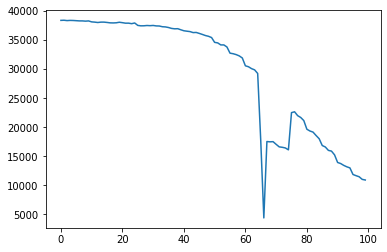

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(qual_values)), qual_values)
plt.show()

In [ ]:
# 7 answer : 66

In [47]:
print(human_genome[:10])

@ERR037900


In [ ]:
for read in reads[1:]:
    seq = (read.split('\n')[1:])
    seq = ''.join(seq)
    print(seq[:10])
    len_seq = len(seq)
    print(len(seq))